In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import pandas as pd
import torchvision.transforms as transforms

df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# mengambil kolom pertama menjadi label (digit 0-9)
# mengambil kolom sisa jadi piksel gambar, membentuk ulang menjadi 28x28, mengubah tipe data
labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)

In [24]:
print(images.shape)
print(labels.shape)

(60000, 28, 28)
(60000,)


In [25]:
from torch.utils.data import Dataset
from PIL import Image

transform = transforms.Compose([
# mengubah gambar menjadi tensor pytorch, menskalakan piksel dari [0, 255] ke [0.0, 1.0],
# menambahkan dimensi channel (sehingga menjadi [1, 28, 28] untuk grayscale)
    transforms.Lambda(lambda x: torch.tensor(x / 255.0, dtype=torch.float32).unsqueeze(0)),
    # Normalisasi gambar ke rentang [-1, 1]. (0.5,) adalah mean dan (0.5,)
    transforms.Normalize((0.5,), (0.5,))
])

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images # simpan data gambar
        self.labels = labels # simpan data label
        self.transform = transform # simpan transformasi yg akan diterapkan

    def __len__(self):
        # reuturn total jumlah sampel dalam dataset
        return len(self.images)

    def __getitem__(self, idx):
        # ambill 1 gambar & label berdasarkan index
        img = self.images[idx]
        label = self.labels[idx]
        
        # Jika ada transformasi yg ditentukan, terapkan ke gambar
        if self.transform:
            img = self.transform(img)
        return img, label

# buat instance dataset dengan data gambar dan label serta transformasi
dataset = MNISTDataset(images, labels, transform=transform)
# buat dataloaader untuk memuat data dalam batch, dengan ukuran batch 64 dan mengacak data
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [26]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),  # lapisan linear pertama
            nn.LeakyReLU(0.2),          # fungsi aktivasi Leaky ReLU 
            nn.Linear(128, 256),        # lapisan linear kedua
            nn.LeakyReLU(0.2),          # fungsi aktivasi Leaky ReLU
            nn.Linear(256, output_dim), # lapisan linear output
            nn.Tanh()                   # fungsi aktivasi Tanh untuk output (skala [-1, 1])
        )

    def forward(self, x):
        # terusskan input (noise) melalui model generator
        return self.model(x)

In [27]:
# fugssi untuk menampilkan gambar yg dihasilkan
def show_generated_images(images, n=5):
    # ubah bentuk tensor gambar sesuai tampilan (batch_size, channel, height, width)
    images = images.view(images.size(0), 1, 28, 28)
    # ambil n gambar pertama, melepaskan dari graph komputasi, pindah ke CPU, dan ubah ke numpy
    grid_img = images[:n].detach().cpu().numpy()

    # buat subplot untuk menampilkan gambar
    fig, axs = plt.subplots(1, n, figsize=(10, 2))
    for i in range(n):
        # tampilkan setiap gambar dalam skala abu-abu
        axs[i].imshow(grid_img[i][0], cmap='gray')
        axs[i].axis('off') # sembunyikan sumbu
    plt.show() # tampilkan plot

Epoch [1/10] Batch [0/938] D_Loss: 1.3924 G_Loss: 0.6824
Epoch [1/10] Batch [100/938] D_Loss: 0.6805 G_Loss: 1.2829
Epoch [1/10] Batch [200/938] D_Loss: 0.0780 G_Loss: 3.3691
Epoch [1/10] Batch [300/938] D_Loss: 0.4486 G_Loss: 1.3690
Epoch [1/10] Batch [400/938] D_Loss: 0.1786 G_Loss: 2.8171
Epoch [1/10] Batch [500/938] D_Loss: 0.0642 G_Loss: 4.1036
Epoch [1/10] Batch [600/938] D_Loss: 0.5927 G_Loss: 2.3998
Epoch [1/10] Batch [700/938] D_Loss: 0.3379 G_Loss: 3.6930
Epoch [1/10] Batch [800/938] D_Loss: 0.0831 G_Loss: 5.2674
Epoch [1/10] Batch [900/938] D_Loss: 0.1448 G_Loss: 3.9700


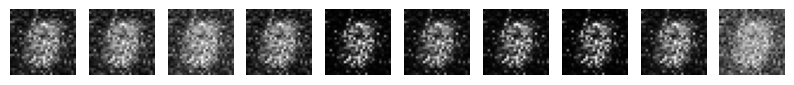

Epoch [2/10] Batch [0/938] D_Loss: 0.1120 G_Loss: 4.0592
Epoch [2/10] Batch [100/938] D_Loss: 0.3280 G_Loss: 2.5194
Epoch [2/10] Batch [200/938] D_Loss: 0.5105 G_Loss: 2.7720
Epoch [2/10] Batch [300/938] D_Loss: 0.2672 G_Loss: 3.8289
Epoch [2/10] Batch [400/938] D_Loss: 0.2113 G_Loss: 4.5204
Epoch [2/10] Batch [500/938] D_Loss: 0.3123 G_Loss: 3.1653
Epoch [2/10] Batch [600/938] D_Loss: 0.4135 G_Loss: 2.9003
Epoch [2/10] Batch [700/938] D_Loss: 0.7771 G_Loss: 1.5889
Epoch [2/10] Batch [800/938] D_Loss: 0.5044 G_Loss: 2.4949
Epoch [2/10] Batch [900/938] D_Loss: 0.9631 G_Loss: 2.2270


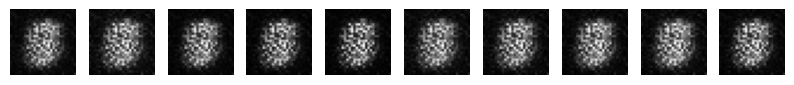

Epoch [3/10] Batch [0/938] D_Loss: 0.5796 G_Loss: 2.4908
Epoch [3/10] Batch [100/938] D_Loss: 0.3809 G_Loss: 2.4254
Epoch [3/10] Batch [200/938] D_Loss: 0.5451 G_Loss: 2.1188
Epoch [3/10] Batch [300/938] D_Loss: 0.6724 G_Loss: 2.8232
Epoch [3/10] Batch [400/938] D_Loss: 0.6297 G_Loss: 2.1566
Epoch [3/10] Batch [500/938] D_Loss: 1.0831 G_Loss: 1.3626
Epoch [3/10] Batch [600/938] D_Loss: 0.8284 G_Loss: 2.5611
Epoch [3/10] Batch [700/938] D_Loss: 0.6614 G_Loss: 1.8552
Epoch [3/10] Batch [800/938] D_Loss: 0.3254 G_Loss: 2.3126
Epoch [3/10] Batch [900/938] D_Loss: 0.7390 G_Loss: 1.6974


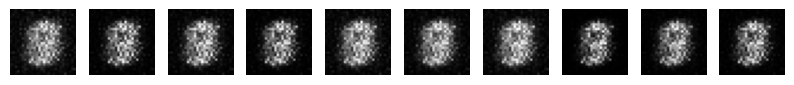

Epoch [4/10] Batch [0/938] D_Loss: 0.6197 G_Loss: 2.1715
Epoch [4/10] Batch [100/938] D_Loss: 0.5648 G_Loss: 1.9162
Epoch [4/10] Batch [200/938] D_Loss: 0.8111 G_Loss: 1.6147
Epoch [4/10] Batch [300/938] D_Loss: 0.2782 G_Loss: 3.3252
Epoch [4/10] Batch [400/938] D_Loss: 0.2087 G_Loss: 3.2893
Epoch [4/10] Batch [500/938] D_Loss: 1.0596 G_Loss: 1.7968
Epoch [4/10] Batch [600/938] D_Loss: 0.5079 G_Loss: 2.6661
Epoch [4/10] Batch [700/938] D_Loss: 0.4189 G_Loss: 2.8960
Epoch [4/10] Batch [800/938] D_Loss: 0.2998 G_Loss: 2.9953
Epoch [4/10] Batch [900/938] D_Loss: 0.3914 G_Loss: 2.4895


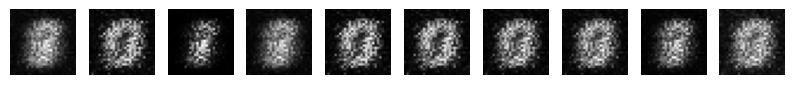

Epoch [5/10] Batch [0/938] D_Loss: 0.3848 G_Loss: 3.0474
Epoch [5/10] Batch [100/938] D_Loss: 0.5246 G_Loss: 3.3304
Epoch [5/10] Batch [200/938] D_Loss: 0.3357 G_Loss: 2.9151
Epoch [5/10] Batch [300/938] D_Loss: 0.3226 G_Loss: 2.3924
Epoch [5/10] Batch [400/938] D_Loss: 0.1804 G_Loss: 3.3412
Epoch [5/10] Batch [500/938] D_Loss: 0.5515 G_Loss: 3.4659
Epoch [5/10] Batch [600/938] D_Loss: 0.2496 G_Loss: 3.6316
Epoch [5/10] Batch [700/938] D_Loss: 0.3898 G_Loss: 3.2792
Epoch [5/10] Batch [800/938] D_Loss: 0.2805 G_Loss: 4.2947
Epoch [5/10] Batch [900/938] D_Loss: 0.4333 G_Loss: 3.3789


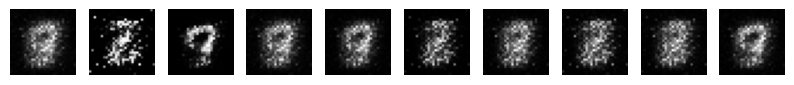

Epoch [6/10] Batch [0/938] D_Loss: 0.5408 G_Loss: 4.0715
Epoch [6/10] Batch [100/938] D_Loss: 0.2294 G_Loss: 4.5305
Epoch [6/10] Batch [200/938] D_Loss: 0.4221 G_Loss: 3.5164
Epoch [6/10] Batch [300/938] D_Loss: 0.2707 G_Loss: 4.3956
Epoch [6/10] Batch [400/938] D_Loss: 0.4193 G_Loss: 3.9103
Epoch [6/10] Batch [500/938] D_Loss: 0.5667 G_Loss: 3.0263
Epoch [6/10] Batch [600/938] D_Loss: 0.3113 G_Loss: 3.7629
Epoch [6/10] Batch [700/938] D_Loss: 0.4107 G_Loss: 2.3592
Epoch [6/10] Batch [800/938] D_Loss: 0.3557 G_Loss: 3.9848
Epoch [6/10] Batch [900/938] D_Loss: 0.4962 G_Loss: 4.2371


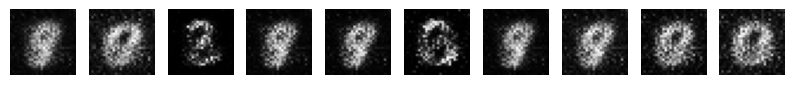

Epoch [7/10] Batch [0/938] D_Loss: 0.2994 G_Loss: 2.8199
Epoch [7/10] Batch [100/938] D_Loss: 0.3592 G_Loss: 2.8836
Epoch [7/10] Batch [200/938] D_Loss: 0.5816 G_Loss: 2.0669
Epoch [7/10] Batch [300/938] D_Loss: 0.2921 G_Loss: 2.6977
Epoch [7/10] Batch [400/938] D_Loss: 0.6750 G_Loss: 2.2969
Epoch [7/10] Batch [500/938] D_Loss: 0.6373 G_Loss: 2.9394
Epoch [7/10] Batch [600/938] D_Loss: 0.6475 G_Loss: 2.3227
Epoch [7/10] Batch [700/938] D_Loss: 0.6846 G_Loss: 2.9974
Epoch [7/10] Batch [800/938] D_Loss: 0.9807 G_Loss: 1.8221
Epoch [7/10] Batch [900/938] D_Loss: 0.4389 G_Loss: 2.1552


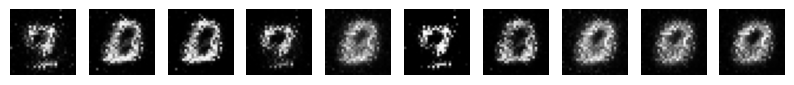

Epoch [8/10] Batch [0/938] D_Loss: 0.3778 G_Loss: 2.8845
Epoch [8/10] Batch [100/938] D_Loss: 0.6885 G_Loss: 2.6299
Epoch [8/10] Batch [200/938] D_Loss: 0.5491 G_Loss: 1.9349
Epoch [8/10] Batch [300/938] D_Loss: 0.4537 G_Loss: 3.1658
Epoch [8/10] Batch [400/938] D_Loss: 0.6227 G_Loss: 2.3084
Epoch [8/10] Batch [500/938] D_Loss: 0.5520 G_Loss: 2.7915
Epoch [8/10] Batch [600/938] D_Loss: 0.4443 G_Loss: 2.7256
Epoch [8/10] Batch [700/938] D_Loss: 0.3558 G_Loss: 3.0131
Epoch [8/10] Batch [800/938] D_Loss: 0.4433 G_Loss: 3.0238
Epoch [8/10] Batch [900/938] D_Loss: 0.2375 G_Loss: 4.0222


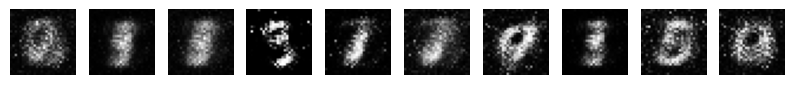

Epoch [9/10] Batch [0/938] D_Loss: 0.2423 G_Loss: 3.2242
Epoch [9/10] Batch [100/938] D_Loss: 0.3980 G_Loss: 3.1394
Epoch [9/10] Batch [200/938] D_Loss: 0.4828 G_Loss: 2.4446
Epoch [9/10] Batch [300/938] D_Loss: 0.5444 G_Loss: 3.4484
Epoch [9/10] Batch [400/938] D_Loss: 0.3459 G_Loss: 2.6578
Epoch [9/10] Batch [500/938] D_Loss: 0.6560 G_Loss: 2.0111
Epoch [9/10] Batch [600/938] D_Loss: 0.5223 G_Loss: 2.6425
Epoch [9/10] Batch [700/938] D_Loss: 0.5095 G_Loss: 2.8730
Epoch [9/10] Batch [800/938] D_Loss: 0.5827 G_Loss: 2.0696
Epoch [9/10] Batch [900/938] D_Loss: 0.8207 G_Loss: 2.5482


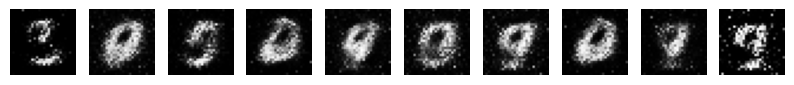

Epoch [10/10] Batch [0/938] D_Loss: 0.6257 G_Loss: 3.6989
Epoch [10/10] Batch [100/938] D_Loss: 0.6293 G_Loss: 3.8801
Epoch [10/10] Batch [200/938] D_Loss: 0.7209 G_Loss: 3.5692
Epoch [10/10] Batch [300/938] D_Loss: 0.8840 G_Loss: 1.9781
Epoch [10/10] Batch [400/938] D_Loss: 0.6848 G_Loss: 3.5761
Epoch [10/10] Batch [500/938] D_Loss: 0.7434 G_Loss: 2.9493
Epoch [10/10] Batch [600/938] D_Loss: 0.8540 G_Loss: 2.5871
Epoch [10/10] Batch [700/938] D_Loss: 0.5365 G_Loss: 2.7642
Epoch [10/10] Batch [800/938] D_Loss: 0.4456 G_Loss: 2.1553
Epoch [10/10] Batch [900/938] D_Loss: 0.7599 G_Loss: 2.9459


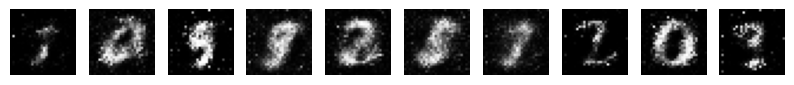

In [37]:
class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
z_dim = 100
img_dim = 28 * 28

generator = Generator(z_dim, img_dim).to(device)
discriminator = Discriminator(img_dim).to(device)

# optimizers terpisah untuk generator dan discriminator
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002) # optimizer untuk generator
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002) # optimizer untuk Discriminator

# untuk GAN, penggunaan Binary Cross Entropy Loss (BCELoss) lebih tepat
criterion = nn.BCELoss()

epochs = 10 

for epoch in range(epochs):
    for batch_idx, (real_images, _) in enumerate(dataloader): # Ganti real menjadi real_images agar tidak konflik
        # flatten gambar asli dan pindahkan ke device
        real_images = real_images.view(-1, img_dim).to(device)
        batch_size = real_images.size(0)

        # label real or fake images
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        optimizer_d.zero_grad()

        # latih dengan gambar asli
        output_real = discriminator(real_images)
        d_loss_real = criterion(output_real, real_labels)

        # latih dengan gambar palsu dari generator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake_images = generator(noise) # hasilakan gambarr palsu
        # detach fake_images dari graph geenerator saat melatih discriminator
        output_fake = discriminator(fake_images.detach())
        d_loss_fake = criterion(output_fake, fake_labels)

        # gabungkaan loss Discriminator
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        optimizer_g.zero_grad() # Gunakan optimizer_g untuk Generator

        # generator mencoba menipu Discriminator, jadi targetnya adalah 'asli' (1)
        output_gen = discriminator(fake_images) # fake_images yang sama tapi terhubung ke graph Generator
        g_loss = criterion(output_gen, real_labels)

        g_loss.backward()
        optimizer_g.step()
        
        if batch_idx % 100 == 0: # print tiaap 100 batch untuk menghindari terlalu banyak output
            print(
                f"Epoch [{epoch+1}/{epochs}] Batch [{batch_idx}/{len(dataloader)}] "
                f"D_Loss: {d_loss.item():.4f} G_Loss: {g_loss.item():.4f}"
            )

    if (epoch + 1) % 1 == 0:
        # hasilkan gambar untuk ditampilkan (gunakan noise tetap untuk melihat progres)
        with torch.no_grad(): # buat tidak ada gradien yang dihitung saat menampilkan
            fixed_noise = torch.randn(10, z_dim).to(device)
            generated_samples = generator(fixed_noise).reshape(-1, 1, 28, 28)
            show_generated_images(generated_samples, n=10)


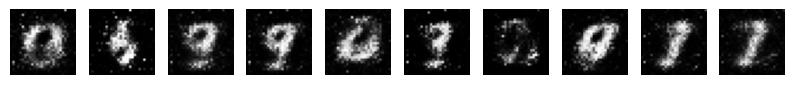

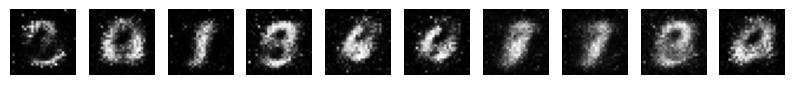

In [38]:
# buat noise baru untuk menghasilkan gambar setelah pelatihan selesai
noise = torch.randn(10, z_dim).to(device)
# hasilkan 10 gambar menggunakan generator yg sudah dilatih
generated_images = generator(noise)
show_generated_images(generated_images, n=10)# buat noise baru untuk menghasilkan gambar setelah pelatihan selesai
noise = torch.randn(10, z_dim).to(device)
# hasilkan 10 gambar menggunakan generator yg sudah dilatih
generated_images = generator(noise)
show_generated_images(generated_images, n=10)

In [39]:
import os   # import modul os untuk operasi sistem file

# buat direktori untuk menyimpan gambar yg dihasilkan dan model
# exist_ok=True mencegah error jika direktori sudah ada
os.makedirs("/kaggle/working/kelompok-baru/generated_images", exist_ok=True)
os.makedirs("/kaggle/working/kelompok-baru/models", exist_ok=True)
# buat file README.md di direktori baru
with open("/kaggle/working/kelompok-baru/README.md", "w")as f:
    f.write("# Kelompok T")

In [40]:
for epoch in range(1, 11) :
    # buat gambar acak dengan 3 channnel (RGB) ukuran 64x64, yg tidak sesuai dengan output generator (28x28 grayscale)
    img = Image.fromarray(np.uint8(np.random.rand(64, 64, 3) * 255))
    img = Image.fromarray(np.uint8(np.random.rand(64, 64, 3) * 255))
    img.save(f"/kaggle/working/kelompok-baru/generated_images/epoch_{epoch}.png")

In [41]:
torch.save(generator, '/kaggle/working/kelompok-baru/models/full_generator.pth')

In [42]:
import shutil # import modul shutil untuk operasi file tingkat tinggi

# buat arsip ZIP dari direktori 'kelompok-baru'
shutil.make_archive(
    "kaggle/working/kelompok-baru",
    'zip',
    root_dir="/kaggle/working/",
    base_dir="kelompok-baru"
)

'/kaggle/working/kaggle/working/kelompok-baru.zip'